<a href="https://colab.research.google.com/github/ltpdo/GradeData-MachineLearing/blob/main/%E7%A7%91%E7%9B%AE%E3%81%94%E3%81%A8%E3%81%AE%E4%BB%95%E5%88%86%E3%81%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ライブラリのインポート

In [40]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import seaborn as sns

# グラフの日本語化
!pip install japanize_matplotlib
import japanize_matplotlib

In [41]:
# 機械学習のインポート
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingClassifier, AdaBoostRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# データの前処理

In [42]:
# Google Driveとの接続
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/卒論/成績データ/')

subject_2021 = pd.read_excel("履修成績データ2021.xlsx")
subject_2021 = subject_2021.drop(columns = ["年度", "学期", "単位数", "成績"])

subject_2021

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,学生番号,科目名,GP
0,21001,ゲームプログラミング演習,4
1,21001,Reading & WritingⅢ,3
2,21001,Listening & SpeakingⅢ,3
3,21001,韓国語Ⅰ,4
4,21001,計算機構成論Ⅱ,4
...,...,...,...
6870,21140,微分積分Ⅰ,1
6871,21140,離散数学Ⅱ,4
6872,21140,倫理学,2
6873,21140,機械工学概論,3


In [43]:
# 科目名ごとに学生番号をカウント
subject_count = subject_2021.groupby('科目名')['学生番号'].nunique().reset_index()
count_by_subject = subject_count.rename(columns = {'学生番号': '履修者数'})
count_by_subject = count_by_subject.set_index('科目名')
count_by_subject

,履修者数
科目名,
Advanced Reading & WritingⅠ,2
Advanced Reading & WritingⅡ,3
Domestic Job Training,1
Four SkillsⅠ,13
Four SkillsⅡ,11
...,...
韓国語会話Ⅱ,3
音楽概論,6
ＡＩプログラミング演習,131


In [44]:
# 科目名ごとに成績をカウント
gp_count_by_subject = subject_2021.groupby(['科目名', 'GP']).size().unstack(fill_value=0)
# 列の値を辞書で置き換える
gp_count_by_subject.columns = ['D', 'C', 'B', 'A', 'S']
gp_count_by_subject

,D,C,B,A,S
科目名,,,,,
Advanced Reading & WritingⅠ,0,0,1,1,0
Advanced Reading & WritingⅡ,1,0,2,0,0
Domestic Job Training,0,0,0,1,0
Four SkillsⅠ,1,0,0,1,11
Four SkillsⅡ,0,0,2,3,6
...,...,...,...,...,...
韓国語会話Ⅱ,0,0,2,0,1
音楽概論,1,0,0,2,3
ＡＩプログラミング演習,5,15,42,45,24


In [45]:
# 結合
data_2021 = pd.merge(count_by_subject, gp_count_by_subject, left_index=True, right_index=True)
data_2021 = data_2021[data_2021["履修者数"] > 100]
data_2021 = data_2021.drop(index = [
    "Listening & SpeakingⅠ", "Listening & SpeakingⅡ", "Listening & SpeakingⅢ", "Listening & SpeakingⅣ",
    "Reading & WritingⅠ", "Reading & WritingⅡ", "Reading & WritingⅢ", "Reading & WritingⅣ"])
data_2021

,履修者数,D,C,B,A,S
科目名,,,,,,
キャリア形成基礎論,140,13,87,34,6,0
コンピュータネットワーク,104,23,15,17,27,22
データ構造とアルゴリズムⅠ,140,8,18,39,52,23
データ構造とアルゴリズムⅠ演習,132,9,0,5,6,112
ハードウェア実験Ⅰ,108,24,1,13,42,28
ハードウェア設計Ⅰ,127,15,18,24,27,43
ハードウェア設計Ⅱ,121,13,12,16,38,42
プログラミング入門,140,5,6,9,53,71
プログラミング基礎Ⅰ,140,3,19,11,29,79


In [46]:
# 使用するデータを保存
data_2021.to_csv('/content/drive/MyDrive/Colab Notebooks/卒論/成績データ/データフレーム/科目データ.csv')

In [66]:
# データ読み込み
data_21 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/卒論/成績データ/データフレーム/科目データ(成績評価方法).xlsx')
data_21

,科目名,履修者数,D,C,B,A,S,テストの割合,小テストの割合,演習(レポート含む),単位取得率,カテゴリ,学年,科目種別,科目区分,単位区分
0,キャリア形成基礎論,140,13,87,34,6,0,40,0,60,0.907,基礎教育科目,1,講義,実践・教養・心,選択
1,コンピュータネットワーク,104,23,15,17,27,22,50,0,50,0.779,専門科目,2,講義,選択,選択
2,データ構造とアルゴリズムⅠ,140,8,18,39,52,23,60,10,30,0.943,専門科目,2,講義,必修科目,必
3,データ構造とアルゴリズムⅠ演習,132,9,0,5,6,112,60,10,30,0.932,専門科目,2,演習,必修科目,必
4,ハードウェア実験Ⅰ,108,24,1,13,42,28,0,0,100,0.808,専門科目,2,実験・実習,必修科目,必
5,ハードウェア設計Ⅰ,127,15,18,24,27,43,75,25,0,0.882,専門科目,2,講義,必修科目,必
6,ハードウェア設計Ⅱ,121,13,12,16,38,42,75,25,0,0.893,専門科目,2,講義,必修科目,必
7,プログラミング入門,140,5,6,9,53,71,0,0,100,0.964,専門科目,1,講義,必修科目,必
8,プログラミング基礎Ⅰ,140,3,19,11,29,79,60,10,30,0.979,専門科目,1,講義,必修科目,必
9,プログラミング基礎Ⅱ,139,7,20,8,26,78,60,10,30,0.950,専門科目,2,講義,必修科目,必


In [ ]:
# 少数に演算
def division_100(x):
  x = round(x / 100, 3)
  return x

# データの前処理
# 割合に変更
data_21["テストの割合"] = data_21["テストの割合"].apply(division_100)
data_21["小テストの割合"] = data_21["小テストの割合"].apply(division_100)
data_21["演習(レポート含む)"] = data_21["演習(レポート含む)"].apply(division_100)

# カテゴリ変数を数値化
lab = LabelEncoder()
lab = lab.fit(data_21["カテゴリ"])
data_21["カテゴリ"] = lab.transform(data_21["カテゴリ"])
lab = lab.fit(data_21["科目種別"])
data_21["科目種別"] = lab.transform(data_21["科目種別"])
lab = lab.fit(data_21["科目区分"])
data_21["科目区分"] = lab.transform(data_21["科目区分"])
lab = lab.fit(data_21["単位区分"])
data_21["単位区分"] = lab.transform(data_21["単位区分"])

# 科目名をindexに変更
data_21 = data_21.set_index("科目名")

data_21

In [ ]:
data_21.dtypes

In [ ]:
data_21.isna().sum()

# 機械学習(評価内容)

## 相関の確認

In [ ]:
data_21.corr()

In [70]:
data_21.columns

Index(['履修者数', 'D', 'C', 'B', 'A', 'S', 'テストの割合', '小テストの割合', '演習(レポート含む)',
       '単位取得率', 'カテゴリ', '学年', '科目種別', '科目区分', '単位区分'],
      dtype='object')

## 重回帰分析

In [74]:
# 目的変数と説明変数
X = data_21.drop("テストの割合", axis = 1)
y = data_21["テストの割合"]

# 訓練データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

# モデル
model = LinearRegression()
model.fit(X_train, y_train)

# 決定係数を表示
print("決定係数(train):{:.3f}".format(model.score(X_train, y_train)))
print("決定係数(test):{:.3f}".format(model.score(X_test, y_test)))

# 回帰係数と切片を表示
print("\n回帰係数\n{}".format(pd.Series(model.coef_, index = X.columns)))
print("切片: {:.3f}".format(model.intercept_))

決定係数(train):1.000
決定係数(test):0.274

回帰係数
履修者数          0.015549
D            -0.010621
C            -0.006962
B            -0.002882
A            -0.006100
S            -0.007755
小テストの割合       0.033403
演習(レポート含む)   -0.838469
単位取得率         0.027415
カテゴリ          0.168037
学年            0.031089
科目種別         -0.124357
科目区分          0.096039
単位区分          0.213937
dtype: float64
切片: -0.417


## 決定木

In [77]:
# 目的変数と説明変数
X = data_21.drop("テストの割合", axis = 1)
y = data_21["テストの割合"]

# 訓練データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# モデル
model = DecisionTreeRegressor(criterion = "squared_error", max_depth = 5, random_state = 0)
model.fit(X_train, y_train)

# 決定係数を表示
print("決定係数(train):{:.3f}".format(model.score(X_train, y_train)))
print("決定係数(test):{:.3f}".format(model.score(X_test, y_test)))

決定係数(train):1.000
決定係数(test):0.943


## ランダムフォレスト

In [78]:
# 目的変数と説明変数
X = data_21.drop("テストの割合", axis = 1)
y = data_21["テストの割合"]

# 訓練データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# モデル
model = RandomForestRegressor(random_state = 0)
model.fit(X_train, y_train)

# 決定係数を表示
print("決定係数(train):{:.3f}".format(model.score(X_train, y_train)))
print("決定係数(test):{:.3f}".format(model.score(X_test, y_test)))

決定係数(train):0.919
決定係数(test):0.512


# 機械学習(科目)

## 相関の確認

In [122]:
data_21 = data_21.T
data_21

科目名,キャリア形成基礎論,コンピュータネットワーク,データ構造とアルゴリズムⅠ,データ構造とアルゴリズムⅠ演習,ハードウェア実験Ⅰ,ハードウェア設計Ⅰ,ハードウェア設計Ⅱ,プログラミング入門,プログラミング基礎Ⅰ,プログラミング基礎Ⅱ,...,情報科学基礎演習,数理的教養Ⅰ,線形代数Ⅰ,線形代数Ⅱ,計算機構成論Ⅰ,計算機構成論Ⅱ,離散数学Ⅰ,離散数学Ⅱ,離散数学Ⅲ,ＡＩプログラミング演習
履修者数,140.000,104.000,140.000,132.000,108.000,127.000,121.000,140.000,140.000,139.00,...,140.000,110.000,138.000,123.000,140.00,132.000,137.000,131.000,116.000,131.000
D,13.000,23.000,8.000,9.000,24.000,15.000,13.000,5.000,3.000,7.00,...,3.000,10.000,4.000,12.000,28.00,21.000,8.000,5.000,3.000,5.000
C,87.000,15.000,18.000,0.000,1.000,18.000,12.000,6.000,19.000,20.00,...,1.000,7.000,6.000,11.000,13.00,15.000,36.000,8.000,1.000,15.000
B,34.000,17.000,39.000,5.000,13.000,24.000,16.000,9.000,11.000,8.00,...,10.000,19.000,17.000,17.000,33.00,38.000,31.000,10.000,8.000,42.000
A,6.000,27.000,52.000,6.000,42.000,27.000,38.000,53.000,29.000,26.00,...,22.000,32.000,40.000,26.000,38.00,42.000,47.000,19.000,21.000,45.000
S,0.000,22.000,23.000,112.000,28.000,43.000,42.000,71.000,79.000,78.00,...,106.000,44.000,72.000,57.000,48.00,16.000,18.000,90.000,83.000,24.000
テストの割合,0.400,0.500,0.600,0.600,0.000,0.750,0.750,0.000,0.600,0.60,...,0.000,0.600,0.600,0.600,0.75,0.500,0.800,0.800,0.800,0.000
小テストの割合,0.000,0.000,0.100,0.100,0.000,0.250,0.250,0.000,0.100,0.10,...,0.000,0.200,0.200,0.200,0.25,0.000,0.100,0.000,0.000,0.000
演習(レポート含む),0.600,0.500,0.300,0.300,1.000,0.000,0.000,1.000,0.300,0.30,...,1.000,0.200,0.200,0.200,0.00,0.500,0.100,0.200,0.200,1.000
単位取得率,0.907,0.779,0.943,0.932,0.808,0.882,0.893,0.964,0.979,0.95,...,0.979,0.909,0.971,0.902,0.80,0.841,0.942,0.962,0.974,0.962


In [ ]:
data_21.corr()

In [80]:
data_21.columns

Index(['キャリア形成基礎論', 'コンピュータネットワーク', 'データ構造とアルゴリズムⅠ', 'データ構造とアルゴリズムⅠ演習',
       'ハードウェア実験Ⅰ', 'ハードウェア設計Ⅰ', 'ハードウェア設計Ⅱ', 'プログラミング入門', 'プログラミング基礎Ⅰ',
       'プログラミング基礎Ⅱ', 'モバイルプログラミング演習', '基礎ゼミナール', '基礎数学', '基礎物理', '微分積分Ⅰ',
       '微分積分Ⅱ', '情報リテラシー', '情報科学基礎演習', '数理的教養Ⅰ', '線形代数Ⅰ', '線形代数Ⅱ', '計算機構成論Ⅰ',
       '計算機構成論Ⅱ', '離散数学Ⅰ', '離散数学Ⅱ', '離散数学Ⅲ', 'ＡＩプログラミング演習'],
      dtype='object', name='科目名')

## 重回帰分析

In [ ]:
# 目的変数と説明変数
X = data_21.drop("ハードウェア設計Ⅱ", axis = 1)
y = data_21["ハードウェア設計Ⅱ"]

# 訓練データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# モデル
model = LinearRegression()
model.fit(X_train, y_train)

# 決定係数を表示
print("決定係数(train):{:.3f}".format(model.score(X_train, y_train)))
print("決定係数(test):{:.3f}".format(model.score(X_test, y_test)))

# 回帰係数と切片を表示
print("\n回帰係数\n{}".format(pd.Series(model.coef_, index = X.columns)))
print("切片: {:.3f}".format(model.intercept_))

In [ ]:
# 回帰係数を棒グラフで表示
plt.figure(figsize=(10, 6))
abs_coefficients = abs(pd.Series(model.coef_, index=X.columns))
abs_coefficients.sort_values().plot(kind='bar')
plt.title('回帰係数の絶対値')
plt.xlabel('科目名')
plt.ylabel('回帰係数の絶対値')
plt.xticks(rotation=90)
plt.show()

### 重回帰分析のすべての科目の決定係数を調べる

In [120]:
# すべての科目
subject_names = [
  'キャリア形成基礎論', 'コンピュータネットワーク', 'データ構造とアルゴリズムⅠ', 'データ構造とアルゴリズムⅠ演習',
  'ハードウェア実験Ⅰ', 'ハードウェア設計Ⅰ', 'ハードウェア設計Ⅱ', 'プログラミング入門', 'プログラミング基礎Ⅰ',
  'プログラミング基礎Ⅱ', 'モバイルプログラミング演習', '基礎ゼミナール', '基礎数学', '基礎物理', '微分積分Ⅰ',
  '微分積分Ⅱ', '情報リテラシー', '情報科学基礎演習', '数理的教養Ⅰ', '線形代数Ⅰ', '線形代数Ⅱ', '計算機構成論Ⅰ',
  '計算機構成論Ⅱ', '離散数学Ⅰ', '離散数学Ⅱ', '離散数学Ⅲ', 'ＡＩプログラミング演習']

# スコアを保存
scores = {}

# 回帰係数を保存
regression_coefficient = {}

for subject in subject_names:
  # 目的変数と説明変数
  X = data_21.drop(subject, axis = 1)
  y = data_21[subject]

  # 訓練データとテストデータ
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

  # モデル
  model = LinearRegression()
  model.fit(X_train, y_train)

  # スコアを格納
  scores[(subject, "train_score")] = model.score(X_train, y_train)
  scores[(subject, "test_score")] = model.score(X_test, y_test)

  # 回帰係数を格納
  regression_coefficient[(subject, "回帰係数")] = pd.Series(model.coef_, index = X.columns)
  regression_coefficient[(subject, "切片")] = round(model.intercept_, 3)

# 結果を表示
pd.Series(scores).unstack()
#pd.Series(regression_coefficient).unstack()

,test_score,train_score
キャリア形成基礎論,0.936210,1.0
コンピュータネットワーク,0.998892,1.0
データ構造とアルゴリズムⅠ,0.826141,1.0
データ構造とアルゴリズムⅠ演習,0.969610,1.0
ハードウェア実験Ⅰ,0.976295,1.0
ハードウェア設計Ⅰ,0.956956,1.0
ハードウェア設計Ⅱ,0.984752,1.0
プログラミング入門,0.268967,1.0
プログラミング基礎Ⅰ,0.540508,1.0
プログラミング基礎Ⅱ,0.890670,1.0


In [133]:
# 決定係数を保存
df_scores = pd.Series(scores).unstack()
df_scores
df_scores.to_csv('/content/drive/MyDrive/Colab Notebooks/卒論/成績データ/データフレーム/科目ごとの決定係数.csv')

In [134]:
# 回帰係数を保存
df_regression_coefficient = pd.Series(regression_coefficient).unstack()
df_regression_coefficient
df_regression_coefficient.to_csv('/content/drive/MyDrive/Colab Notebooks/卒論/成績データ/データフレーム/科目ごとの回帰係数.csv')

## 決定木

In [89]:
# 目的変数と説明変数
X = data_21.drop("ハードウェア実験Ⅰ", axis = 1)
y = data_21["ハードウェア実験Ⅰ"]

# 訓練データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# モデル
model = DecisionTreeRegressor(criterion = "squared_error", max_depth = 1, random_state = 0)
model.fit(X_train, y_train)

# 決定係数を表示
print("決定係数(train):{:.3f}".format(model.score(X_train, y_train)))
print("決定係数(test):{:.3f}".format(model.score(X_test, y_test)))

決定係数(train):0.821
決定係数(test):-0.054


## ランダムフォレスト

In [103]:
# 目的変数と説明変数
X = data_21.drop("データ構造とアルゴリズムⅠ", axis = 1)
y = data_21["データ構造とアルゴリズムⅠ"]

# 訓練データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# モデル
model = RandomForestRegressor(random_state = 0)
model.fit(X_train, y_train)

# 決定係数を表示
print("決定係数(train):{:.3f}".format(model.score(X_train, y_train)))
print("決定係数(test):{:.3f}".format(model.score(X_test, y_test)))

決定係数(train):0.928
決定係数(test):0.450


<Figure size 1000x600 with 0 Axes>

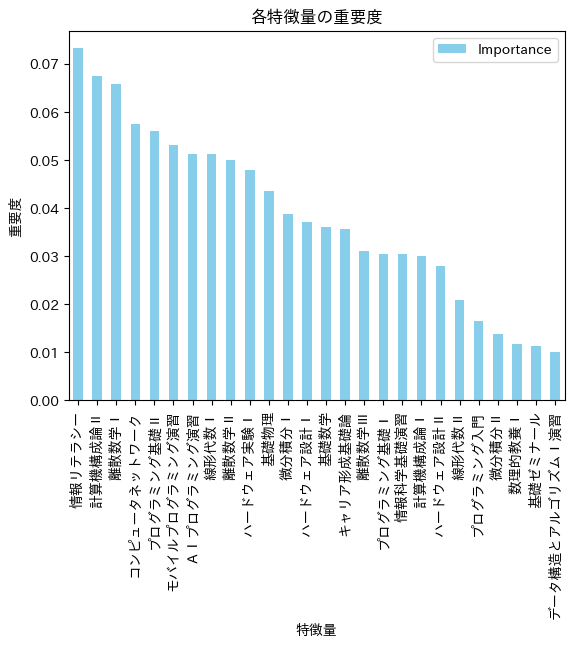

In [105]:
# モデルの学習時に使用された特徴量の名前を取得
feature_names = X.columns

# データフレームからモデルの学習に使用されなかった列を削除
data_21_reduced = data_21[feature_names]

# 不要な列を削除
data_21_reduced = data_21.drop("データ構造とアルゴリズムⅠ", axis=1)  # 不要な列の名前を指定して削除

# モデルの特徴量の重要度を取得
importances = model.feature_importances_

# 特徴量の重要度を DataFrame に変換
feature_importances_df = pd.DataFrame(importances, index=data_21_reduced.columns, columns=['Importance'])

# グラフで表示
plt.figure(figsize=(10, 6))
feature_importances_df.sort_values(by='Importance', ascending=False).plot(kind='bar', color='skyblue')
plt.title('各特徴量の重要度')
plt.xlabel('特徴量')
plt.ylabel('重要度')
plt.show()
